In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

ValueError: mount failed

In [ ]:
cd /content/

/content


In [ ]:
# importing the necessary library for the data preprocessing stage

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import zipfile
from tensorflow.keras import layers
from tensorflow.keras import Model
from sklearn.preprocessing import LabelBinarizer
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD
from keras.datasets import cifar10
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(cv2.__version__)

4.11.0


In [ ]:
import keras
from keras.layers import Layer
import keras.backend as K
import tensorflow as tf

from keras.models import Model
from keras.layers import Conv2D, MaxPool2D,  \
    Dropout, Dense, Input, concatenate,      \
    GlobalAveragePooling2D, AveragePooling2D,\
    Flatten, BatchNormalization, Activation, Add

from keras.layers import MaxPooling2D, Input
from keras.initializers import glorot_uniform

import cv2
import numpy as np
from keras.datasets import cifar10, fashion_mnist
from keras import backend as K
from keras import utils

from keras import backend as K
from keras.regularizers import l2

import math
from keras.optimizers import SGD, Adam, Adadelta
from keras.callbacks import LearningRateScheduler
from keras.activations import relu, softmax
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint
from sklearn.metrics import confusion_matrix

from keras.utils import plot_model
#from keras.utils.vis_utils import model_to_dot
from IPython.display import HTML, display, clear_output, SVG

import warnings
warnings.filterwarnings("ignore")

In [ ]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [ ]:
data_root = '/content/ColumbiaGazeProcessed'

train_dir = os.path.join(data_root, 'train')
val_dir = os.path.join(data_root, 'val')
test_dir = os.path.join(data_root, 'test')

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

train_dataset = datasets.ImageFolder(train_dir, transform=transform)
val_dataset = datasets.ImageFolder(val_dir, transform=transform)
test_dataset = datasets.ImageFolder(test_dir, transform=transform)

g = torch.Generator().manual_seed(42028)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, generator=g, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, pin_memory=True)

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.optim import Adam
from torchvision import datasets, transforms, models

model = models.resnet18(pretrained=True)
num_classes = len(train_dataset.classes)
model.fc = nn.Linear(model.fc.in_features, num_classes)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=1e-4)

In [ ]:
from tqdm import tqdm

def train_one_epoch(model, loader, optimizer, criterion):
    model.train()
    running_loss = 0.0
    correct, total = 0, 0
    for images, labels in tqdm(loader, desc="Training", leave=False):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        correct += predicted.eq(labels).sum().item()
        total += labels.size(0)
    return running_loss / len(loader), correct / total

In [ ]:
def evaluate(model, loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = outputs.max(1)
            correct += predicted.eq(labels).sum().item()
            total += labels.size(0)
    return correct / total

In [ ]:
num_epochs = 10
history = {"train_loss": [], "train_acc": [], "val_acc": []}

best_val_acc = 0.0
best_model_path = "best_model.pth"

for epoch in range(num_epochs):
    train_loss, train_acc = train_one_epoch(model, train_loader, optimizer, criterion)
    val_acc = evaluate(model, val_loader)

    history["train_loss"].append(train_loss)
    history["train_acc"].append(train_acc)
    history["val_acc"].append(val_acc)

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), best_model_path)
        print(f"✅ Epoch {epoch+1}: Val Acc Improved → {val_acc:.4f}, Model Saved to '{best_model_path}'")

    print(f"Epoch {epoch+1}: Loss={train_loss:.4f}, Train Acc={train_acc:.4f}, Val Acc={val_acc:.4f}")

✅ Epoch 1: Val Acc Improved → 0.7950, Model Saved to 'best_model.pth'
Epoch 1: Loss=1.0202, Train Acc=0.6276, Val Acc=0.7950


Epoch 2: Loss=0.4538, Train Acc=0.8298, Val Acc=0.7401


✅ Epoch 3: Val Acc Improved → 0.8322, Model Saved to 'best_model.pth'
Epoch 3: Loss=0.3165, Train Acc=0.8798, Val Acc=0.8322


✅ Epoch 4: Val Acc Improved → 0.8564, Model Saved to 'best_model.pth'
Epoch 4: Loss=0.2606, Train Acc=0.9018, Val Acc=0.8564


Epoch 5: Loss=0.1790, Train Acc=0.9328, Val Acc=0.8125


✅ Epoch 6: Val Acc Improved → 0.8596, Model Saved to 'best_model.pth'
Epoch 6: Loss=0.1740, Train Acc=0.9401, Val Acc=0.8596


✅ Epoch 7: Val Acc Improved → 0.8750, Model Saved to 'best_model.pth'
Epoch 7: Loss=0.1517, Train Acc=0.9452, Val Acc=0.8750


Epoch 8: Loss=0.0861, Train Acc=0.9714, Val Acc=0.8136


Epoch 9: Loss=0.0870, Train Acc=0.9695, Val Acc=0.8607


Epoch 10: Loss=0.0876, Train Acc=0.9726, Val Acc=0.8673


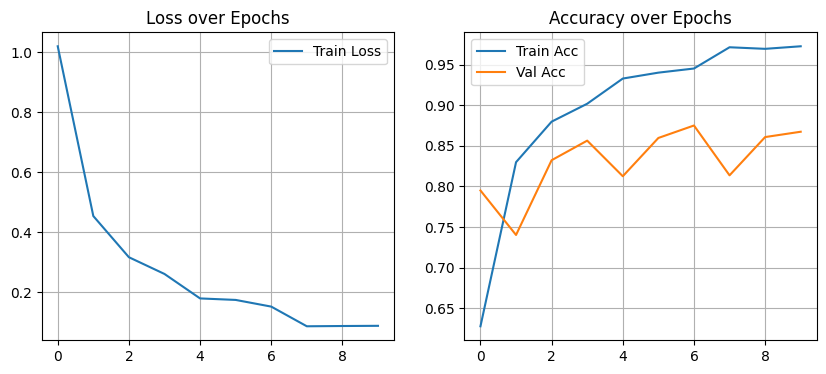

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history["train_loss"], label="Train Loss")
plt.title("Loss over Epochs")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.plot(history["train_acc"], label="Train Acc")
plt.plot(history["val_acc"], label="Val Acc")
plt.title("Accuracy over Epochs")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
model.load_state_dict(torch.load("best_model.pth"))
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
def evaluate(model, loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = outputs.max(1)
            correct += predicted.eq(labels).sum().item()
            total += labels.size(0)
    return correct / total

test_acc = evaluate(model, test_loader)
print(f"Test Accuracy: {test_acc:.4f}")

Test Accuracy: 0.8962
